In [330]:
# Importamos librerías para distintas tareas de análisis de datos:

import seaborn as sns  # Creación de visualizaciones atractivas
import plotly.express as px  # Visualizaciones interactivas
import matplotlib.pyplot as plt  # Creación de gráficos básicos
import plotly.graph_objects as go  # Gráficos plotly personalizados
import plotly.figure_factory as ff  # Creación de tipos específicos de gráficos plotly
from sklearn.metrics import mean_squared_error

import numpy as np  # Cálculos numéricos y operaciones con matrices
import pandas as pd  # Manipulación y análisis de datos en DataFrames (similares a hojas de cálculo)

# Opcionalmente, podemos desactivar las advertencias durante la ejecución del código:
import warnings
warnings.filterwarnings('ignore')  # Ten cuidado, algunas advertencias pueden indicar problemas

# Establecemos un estilo predeterminado para los gráficos de matplotlib:
plt.style.use('fivethirtyeight')  # Estilo similar al utilizado por FiveThirtyEight

In [331]:
data_original =pd.read_csv('./water_potability.csv')
data = data_original.copy()
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# EDA

| Feature | Description | Units |
|---|---|---|
| pH | pH of water | dimensionless |
| Hardness | Capacity of water to precipitate soap | mg/L |
| Solids | Total dissolved solids | ppm |
| Chloramines | Amount of Chloramines | ppm |
| Sulfate | Amount of Sulfates dissolved | mg/L |
| Conductivity | Electrical conductivity of water | μS/cm |
| Organic_carbon | Amount of organic carbon | ppm |
| Trihalomethanes | Amount of Trihalomethanes | μg/L |
| Turbidity | Measure of light emitting property of water | NTU |
| Potability | Indicates if water is safe for human consumption | boolean |

In [332]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [334]:
print(f"El dataset contiene {data.shape[0]} registros y {data.shape[1]} características.")

El dataset contiene 3276 registros y 10 características.


## Valores Null

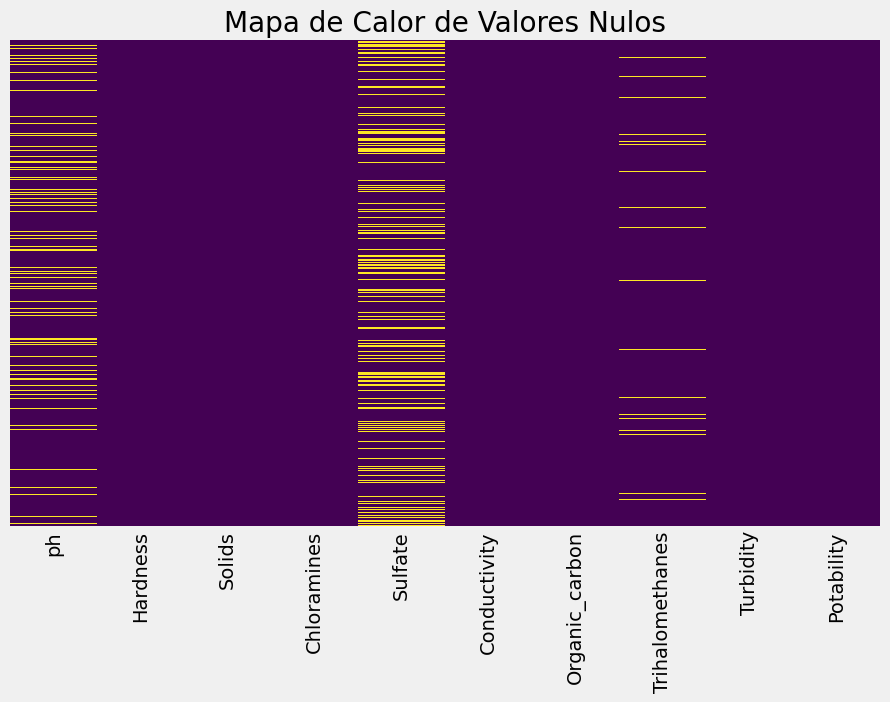

In [335]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

In [336]:
# Iterar sobre las columnas del DataFrame
for column in data.columns:
    # Contar los valores nulos en la columna actual
    null_count = data[column].isnull().sum()
    null_percentage = null_count/data[column].count().round(2)*100
    # Imprimir un mensaje si hay valores nulos
    if null_count > 0:
        print(f"Hay {null_count} valores nulos en la columna '{column}', lo que significa un {null_percentage:.2f}% de los datos")

Hay 491 valores nulos en la columna 'ph', lo que significa un 17.63% de los datos
Hay 781 valores nulos en la columna 'Sulfate', lo que significa un 31.30% de los datos
Hay 162 valores nulos en la columna 'Trihalomethanes', lo que significa un 5.20% de los datos


## Limpiando valores Null

### PH

In [337]:
data['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [338]:
# Calcular la media del pH
media_ph = data['ph'].mean()

# Calcular la mediana del pH
mediana_ph = data['ph'].median()

# Imprimir los resultados
print(f"La media del pH es: {media_ph:.2f}")
print(f"La mediana del pH es: {mediana_ph:.2f}")

La media del pH es: 7.08
La mediana del pH es: 7.04


Al no existir una gran varianza entre la media y la mediana se decide rellenar los valores faltantes con la media.

In [339]:
# Rellenar los valores nulos de la columna 'ph' con la media
data['ph_rellenado_media'] = data['ph'].fillna(data['ph'].mean())

# Verificar si quedan valores nulos en la columna rellenada
print(f"Número de valores nulos en 'ph_rellenado_media': {data['ph_rellenado_media'].isnull().sum()}")

Número de valores nulos en 'ph_rellenado_media': 0


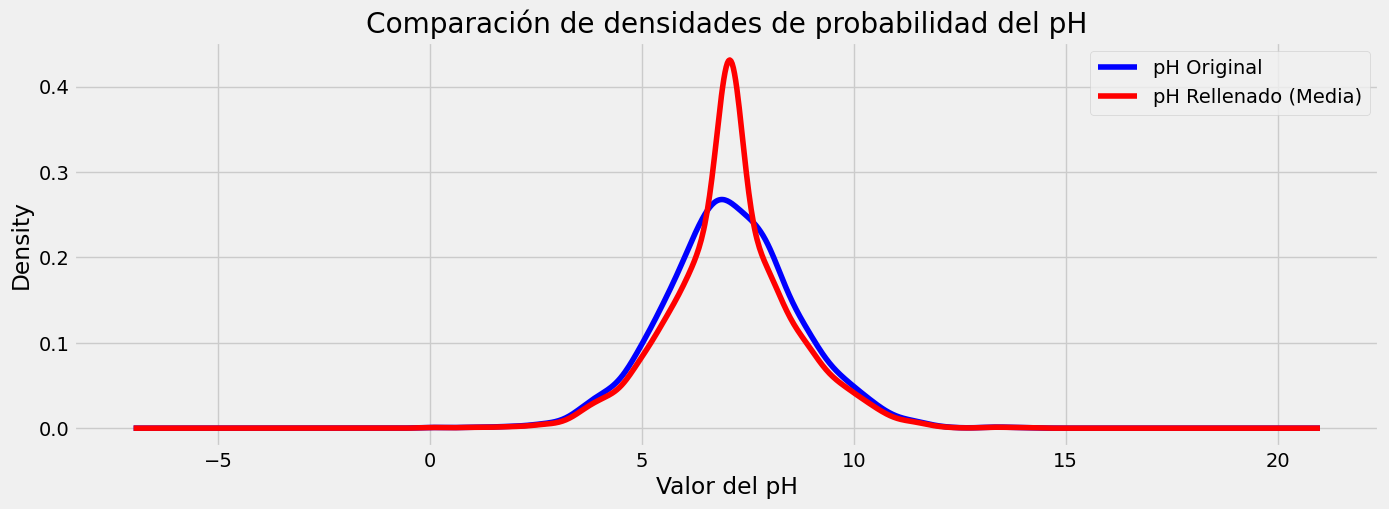

In [340]:
# Crear una figura para el gráfico
fig, ax = plt.subplots(figsize=(15, 5))

# Diagrama de densidad de probabilidad (KDE) para 'ph' original
data['ph'].plot(kind='kde', ax=ax, label='pH Original', color='blue')

# Diagrama de densidad de probabilidad (KDE) para 'ph_rellenado_media'
data['ph_rellenado_media'].plot(kind='kde', ax=ax, label='pH Rellenado (Media)', color='red')

# Añadir leyenda
ax.legend(loc='best')

# Título y etiquetas para el eje x
plt.title('Comparación de densidades de probabilidad del pH')
plt.xlabel('Valor del pH')

# Mostrar el gráfico
plt.show()

## Análisis del gráfico de densidad del pH por la media
* La imputación por la media ha aumentado ligeramente la variabilidad y las colas de la distribución.
* Considerar otras técnicas de imputación para un análisis más robusto.

**Conclusión:** El gráfico muestra que rellenar los valores faltantes con la media puede alterar la distribución original de los datos, especialmente en las colas.

Número de valores nulos en 'ph' con método linear: 1
   ph  ph_linear
0 NaN        NaN


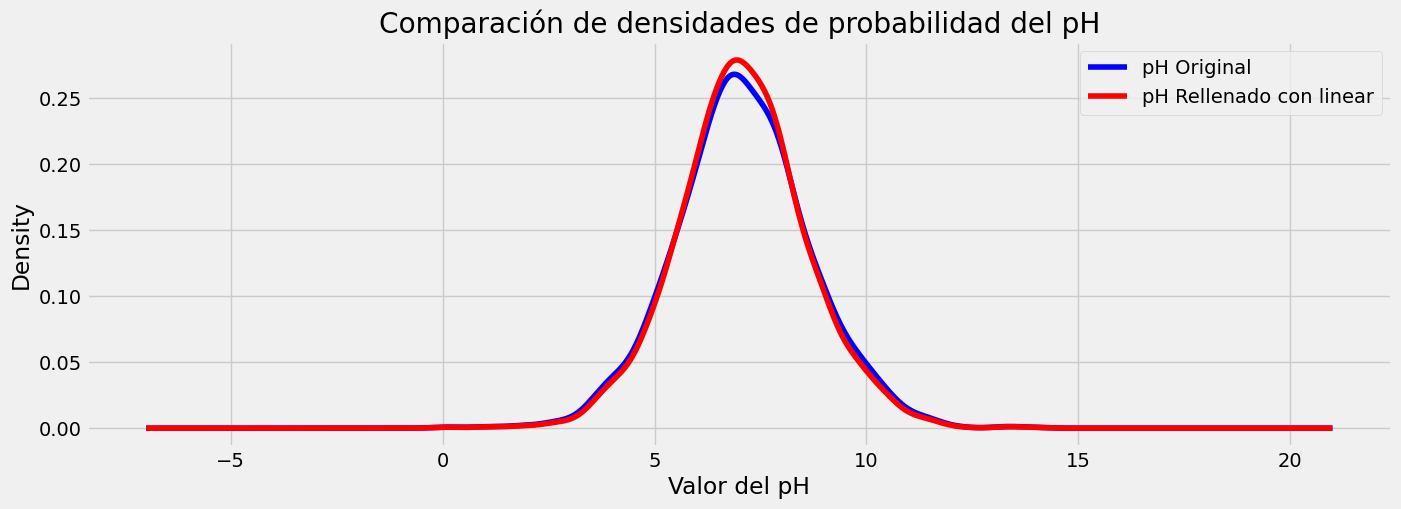

Número de valores nulos en 'ph' con método quadratic: 1
   ph  ph_linear  ph_quadratic
0 NaN        NaN           NaN


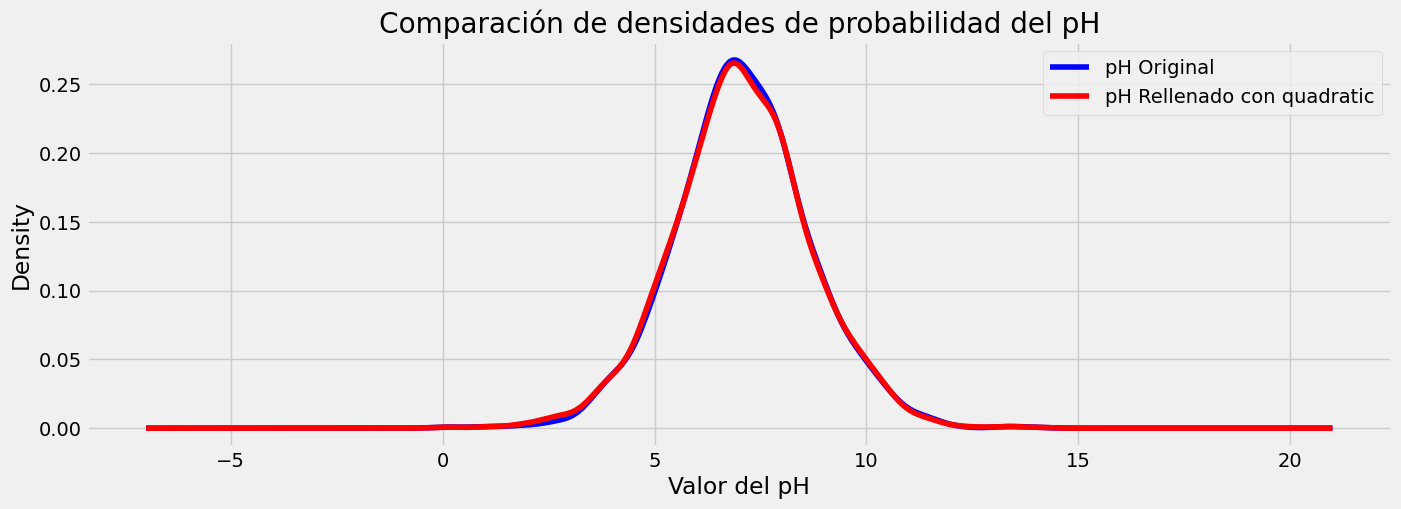

Número de valores nulos en 'ph' con método cubic: 1
   ph  ph_linear  ph_quadratic  ph_cubic
0 NaN        NaN           NaN       NaN


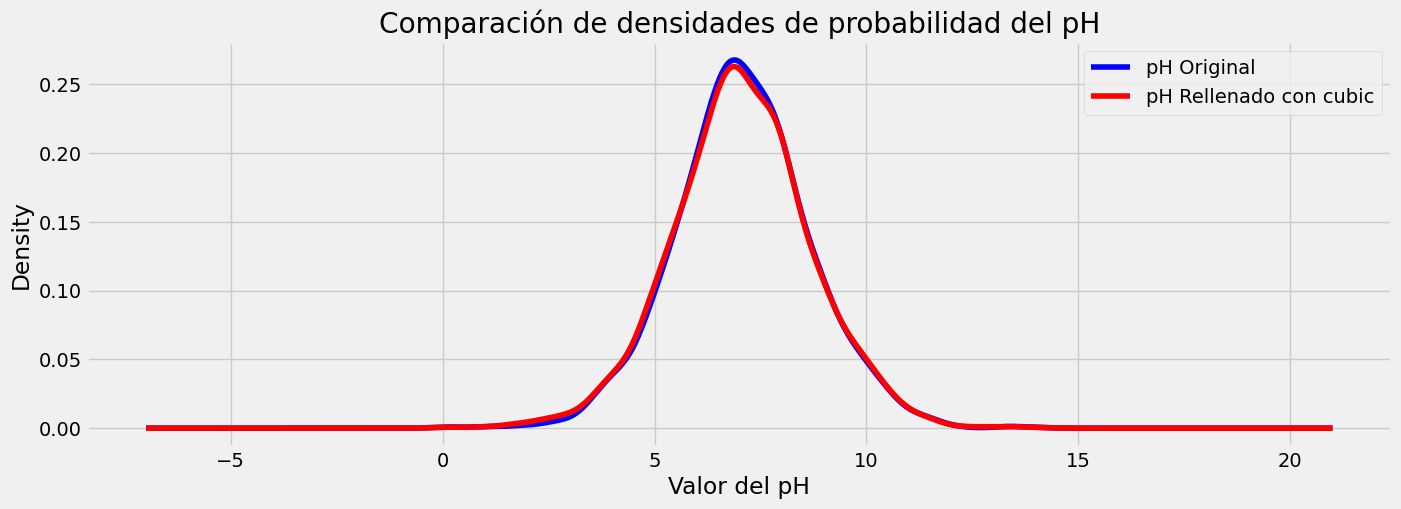

Número de valores nulos en 'ph' con método spline: 1
   ph  ph_linear  ph_quadratic  ph_cubic  ph_spline
0 NaN        NaN           NaN       NaN        NaN


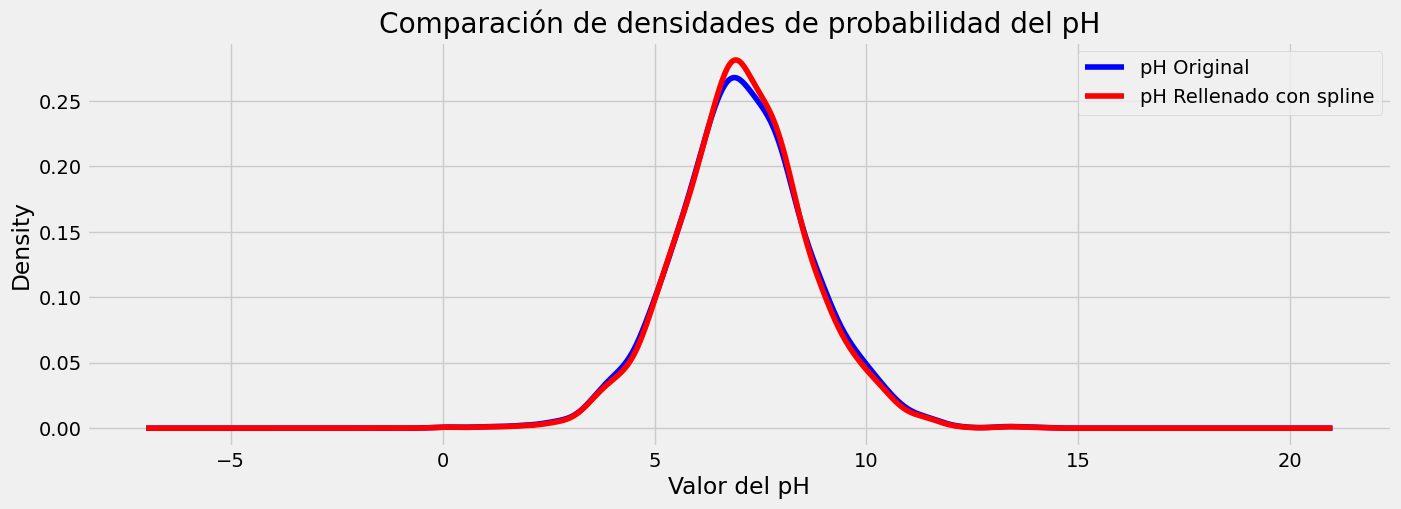

Número de valores nulos en 'ph' con método akima: 1
   ph  ph_linear  ph_quadratic  ph_cubic  ph_spline  ph_akima
0 NaN        NaN           NaN       NaN        NaN       NaN


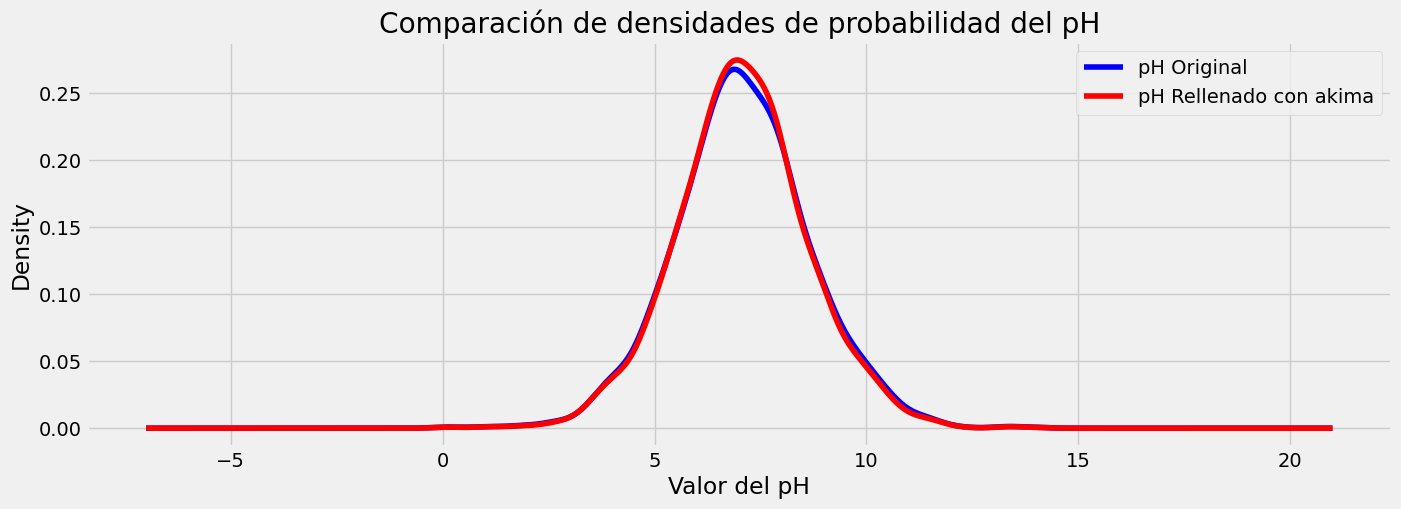

In [341]:
# Lista de métodos de interpolación a probar
methods = ['linear', 'quadratic', 'cubic', 'spline','akima']

data_ph = pd.DataFrame(data['ph'])

# Iterar sobre los métodos y crear gráficos para comparar
for method in methods:
    # Crear una copia del DataFrame para no modificar el original
        
    # Interpolar los valores nulos usando el método actual
    if method == 'spline':
        data_ph[f'ph_{method}'] = data_ph['ph'].interpolate(method=method, order=3)
    else:
        data_ph[f'ph_{method}'] = data_ph['ph'].interpolate(method=method)
    # Verificar si quedan valores nulos
    print(f"Número de valores nulos en 'ph' con método {method}: {data_ph[f'ph_{method}'].isnull().sum()}")
    print(data_ph[data_ph[f'ph_{method}'].isnull()])
    
    # Crear un gráfico para visualizar la interpolación
    fig, ax = plt.subplots(figsize=(15, 5))
    # Diagrama de densidad de probabilidad (KDE) para 'ph' original
    data_ph['ph'].plot(kind='kde', ax=ax, label='pH Original', color='blue')
    # Diagrama de densidad de probabilidad (KDE) para 'ph' interpolado
    data_ph[f'ph_{method}'].plot(kind='kde', ax=ax, label=f'pH Rellenado con {method}', color='red')
    # Añadir leyenda
    ax.legend(loc='best')
    # Título y etiquetas para el eje x
    plt.title('Comparación de densidades de probabilidad del pH')
    plt.xlabel('Valor del pH')
    # Mostrar el gráfico
    plt.show()

## Análisis del gráfico de densidad del pH por la interpolación

Las gráficas presentadas comparan la distribución de probabilidad del pH original con las distribuciones obtenidas después de rellenar los valores faltantes utilizando diferentes métodos de interpolación: *linear*, *quadratic*, *cubic*, *spline*, *akima*. Esto nos permite evaluar la efectividad de cada método en preservar las características principales de la distribución original y su impacto en el análisis posterior de los datos.

**Conclusión:**  La gráfica sugiere que el método de interpolación cuadrática ha sido exitoso en preservar las características principales de la distribución del pH. 

En resumen, el gráfico sugiere que la interpolación ha sido una estrategia exitosa para tratar los valores faltantes en la variable pH. Ahora realizaremos la misma tarea para las caracteristicas restantes.

Rellenando los valores faltantes con la interpolación cuadrática. 

In [342]:
def imputar_nan(df, variable):
  """
  Esta función imputa valores faltantes en una columna del DataFrame utilizando 
  interpolación cuadrática y genera una gráfica para visualizar las distribuciones de 
  probabilidad de los datos originales e interpolados.

  Args:
      df (pandas.DataFrame): El DataFrame que contiene la columna con valores faltantes.
      variable (str): El nombre de la columna en la que se realizará la imputación.

  Returns:
      pandas.DataFrame: El DataFrame modificado con la nueva columna que contiene los valores interpolados.
  """
  # Crea una nueva columna con el sufijo "_cuadratica" para los valores interpolados
  df[variable + "_cuadratica"] = df[variable].interpolate(method='quadratic')

  # Crea una figura y un subplot para la visualización
  fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño de la figura (opcional)

  # Genera la gráfica de densidad de probabilidad (KDE) para los datos originales
  df[variable].plot(kind='kde', ax=ax, label='Datos originales', color='blue')

  # Genera la gráfica de densidad de probabilidad (KDE) para los datos interpolados
  df[variable + "_cuadratica"].plot(kind='kde', ax=ax, label='Datos interpolados', color='green')

  # Añade título, etiquetas para los ejes y leyenda a la gráfica
  ax.set_title('Distribución de probabilidad del pH (original e interpolado)')
  ax.set_xlabel('Valor del pH')
  ax.set_ylabel('Densidad de probabilidad')
  ax.legend()

  # Muestra la gráfica
  plt.show()
  return df

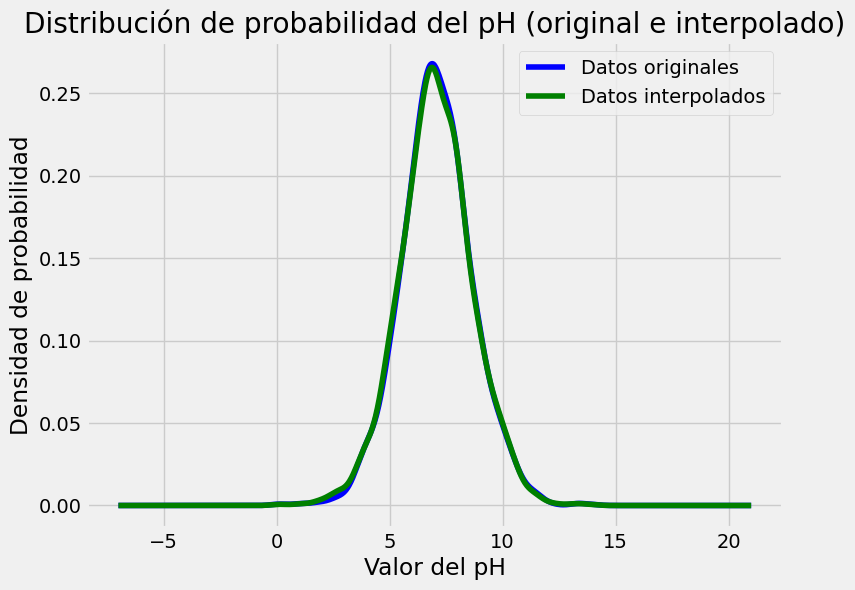

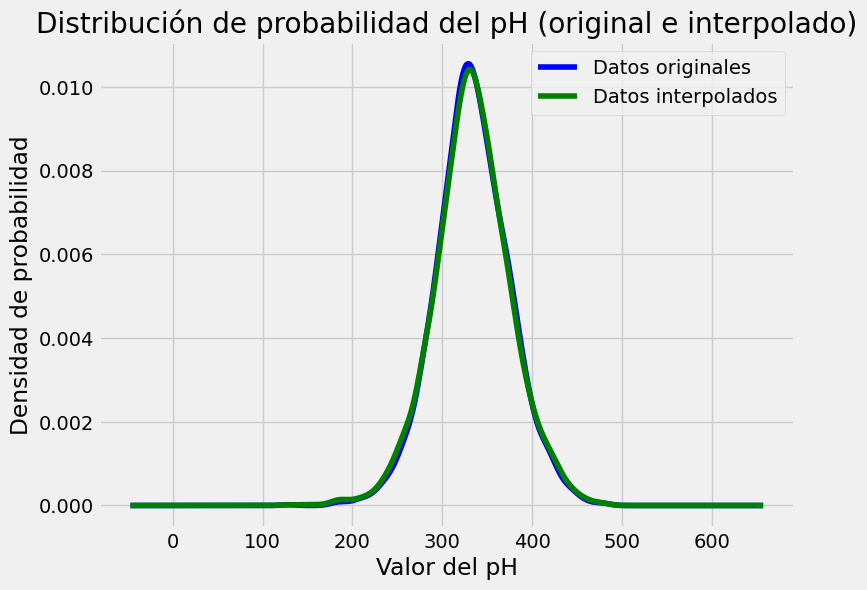

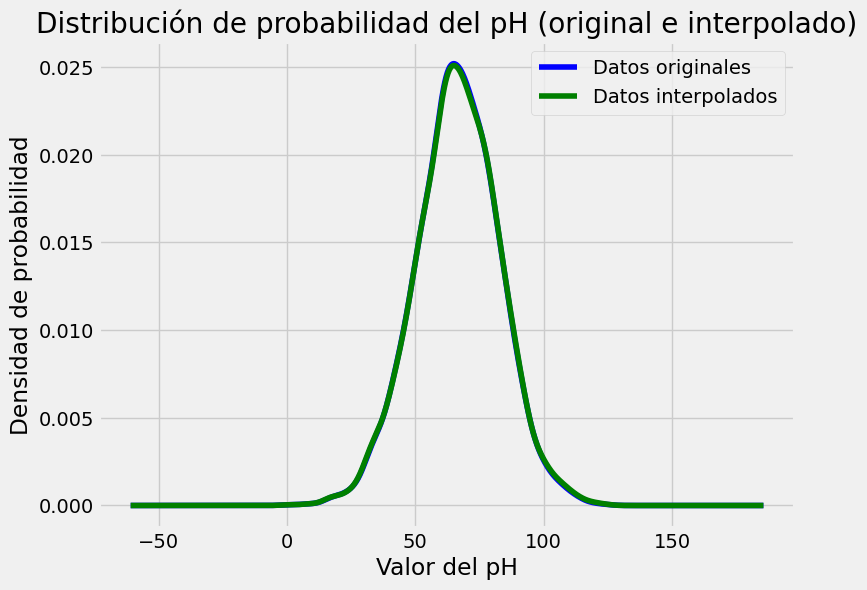

ph                            491
Hardness                        0
Solids                          0
Chloramines                     0
Sulfate                       781
Conductivity                    0
Organic_carbon                  0
Trihalomethanes               162
Turbidity                       0
Potability                      0
ph_rellenado_media              0
ph_cuadratica                   1
Sulfate_cuadratica              4
Trihalomethanes_cuadratica      0
dtype: int64


In [343]:
columns = ['ph','Sulfate','Trihalomethanes']  # Columnas seleccionadas para imputación

# Iterar sobre las columnas seleccionadas y aplicar la función de imputación
for column in columns:
    imputar_nan(data, column)  # Llama a la función para imputar valores faltantes en la columna especificada

# Verificar la cantidad de valores nulos restantes en el DataFrame
print(data.isnull().sum())  # Imprime el conteo de valores nulos por columna

In [344]:
# Eliminamos las columnas que originalmente tenian valores nulos.
data=data.drop(['ph','Sulfate','Trihalomethanes','ph_rellenado_media'],axis=1)

# También hemos visto que tras la limpieza de los datos seguimos teniendo valores nulos, estos al yo no ser significativos se elige eliminarlos.
data.dropna(inplace=True)

# Por último verificamos que ya no tenemos valores nulos en nuestro data frame.

data.isnull().sum()

Hardness                      0
Solids                        0
Chloramines                   0
Conductivity                  0
Organic_carbon                0
Turbidity                     0
Potability                    0
ph_cuadratica                 0
Sulfate_cuadratica            0
Trihalomethanes_cuadratica    0
dtype: int64

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3271 entries, 1 to 3271
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hardness                    3271 non-null   float64
 1   Solids                      3271 non-null   float64
 2   Chloramines                 3271 non-null   float64
 3   Conductivity                3271 non-null   float64
 4   Organic_carbon              3271 non-null   float64
 5   Turbidity                   3271 non-null   float64
 6   Potability                  3271 non-null   int64  
 7   ph_cuadratica               3271 non-null   float64
 8   Sulfate_cuadratica          3271 non-null   float64
 9   Trihalomethanes_cuadratica  3271 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 281.1 KB


## Revisión de la correlación

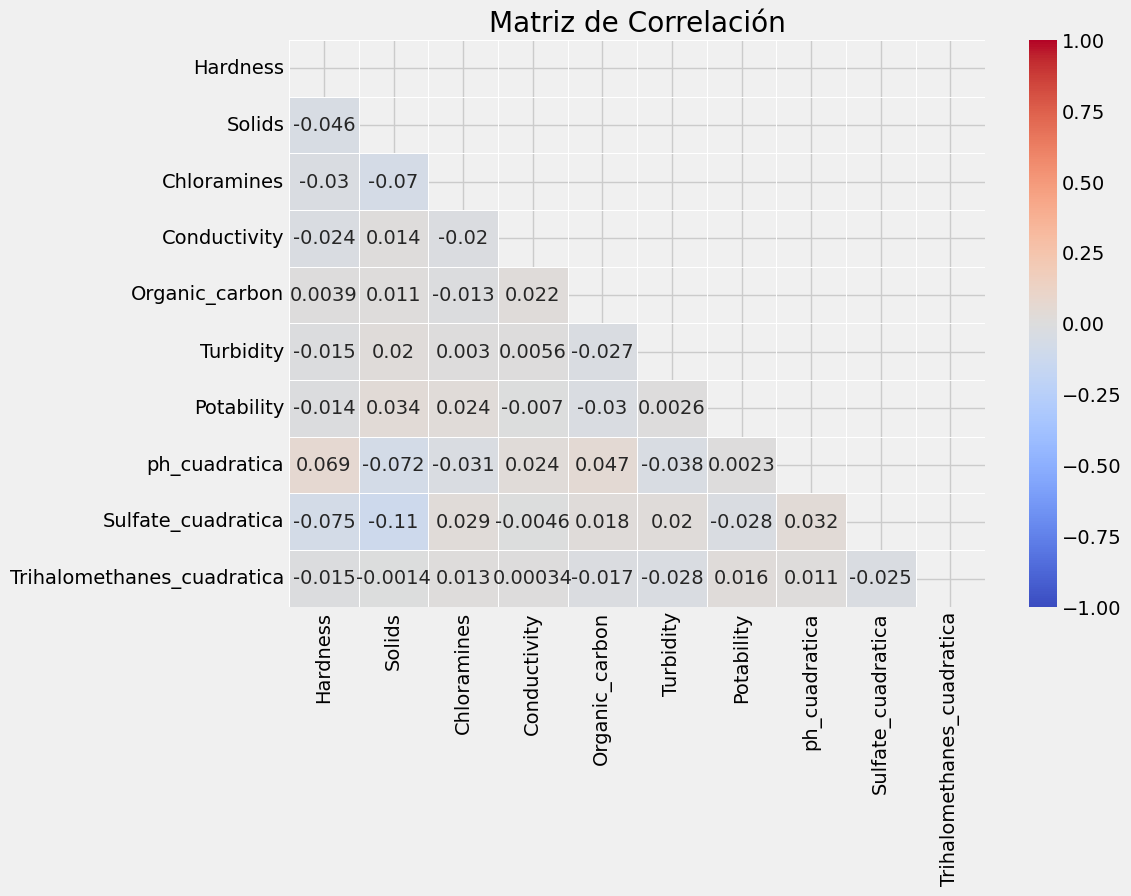

In [351]:
# Crear el heatmap
plt.figure(figsize=(10, 7))  # Ajustar tamaño de la figura
corr_matrix = data.corr()  # Calcular la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Crear una máscara para el triángulo superior
sns.heatmap(corr_matrix,
            annot=True,  # Mostrar los valores de correlación
            linewidths=0.5,  # Ancho de las líneas entre celdas
            cmap='coolwarm',  # Paleta de colores divergente
            vmin=-1, vmax=1,  # Límites del colormap
            mask=mask,  # Aplicar la máscara para ocultar el triángulo superior
            center=0  # Centrar la paleta de colores en 0
           )
plt.title('Matriz de Correlación')
plt.show()

# Análisis de la matriz de correlación

* **Correlaciones débiles:** La mayoría de las variables presentan correlaciones débiles, lo que indica que no existe una relación lineal fuerte entre ellas.
* **Correlaciones moderadas:** Algunas variables, como 'Hardness' y 'Solids', muestran una correlación positiva moderada, sugiriendo una relación directa.
* **Posibles relaciones inversas:** La potabilidad parece estar relacionada negativamente con variables como 'Sulfate_cuadratica' y 'ph_cuadratica'.

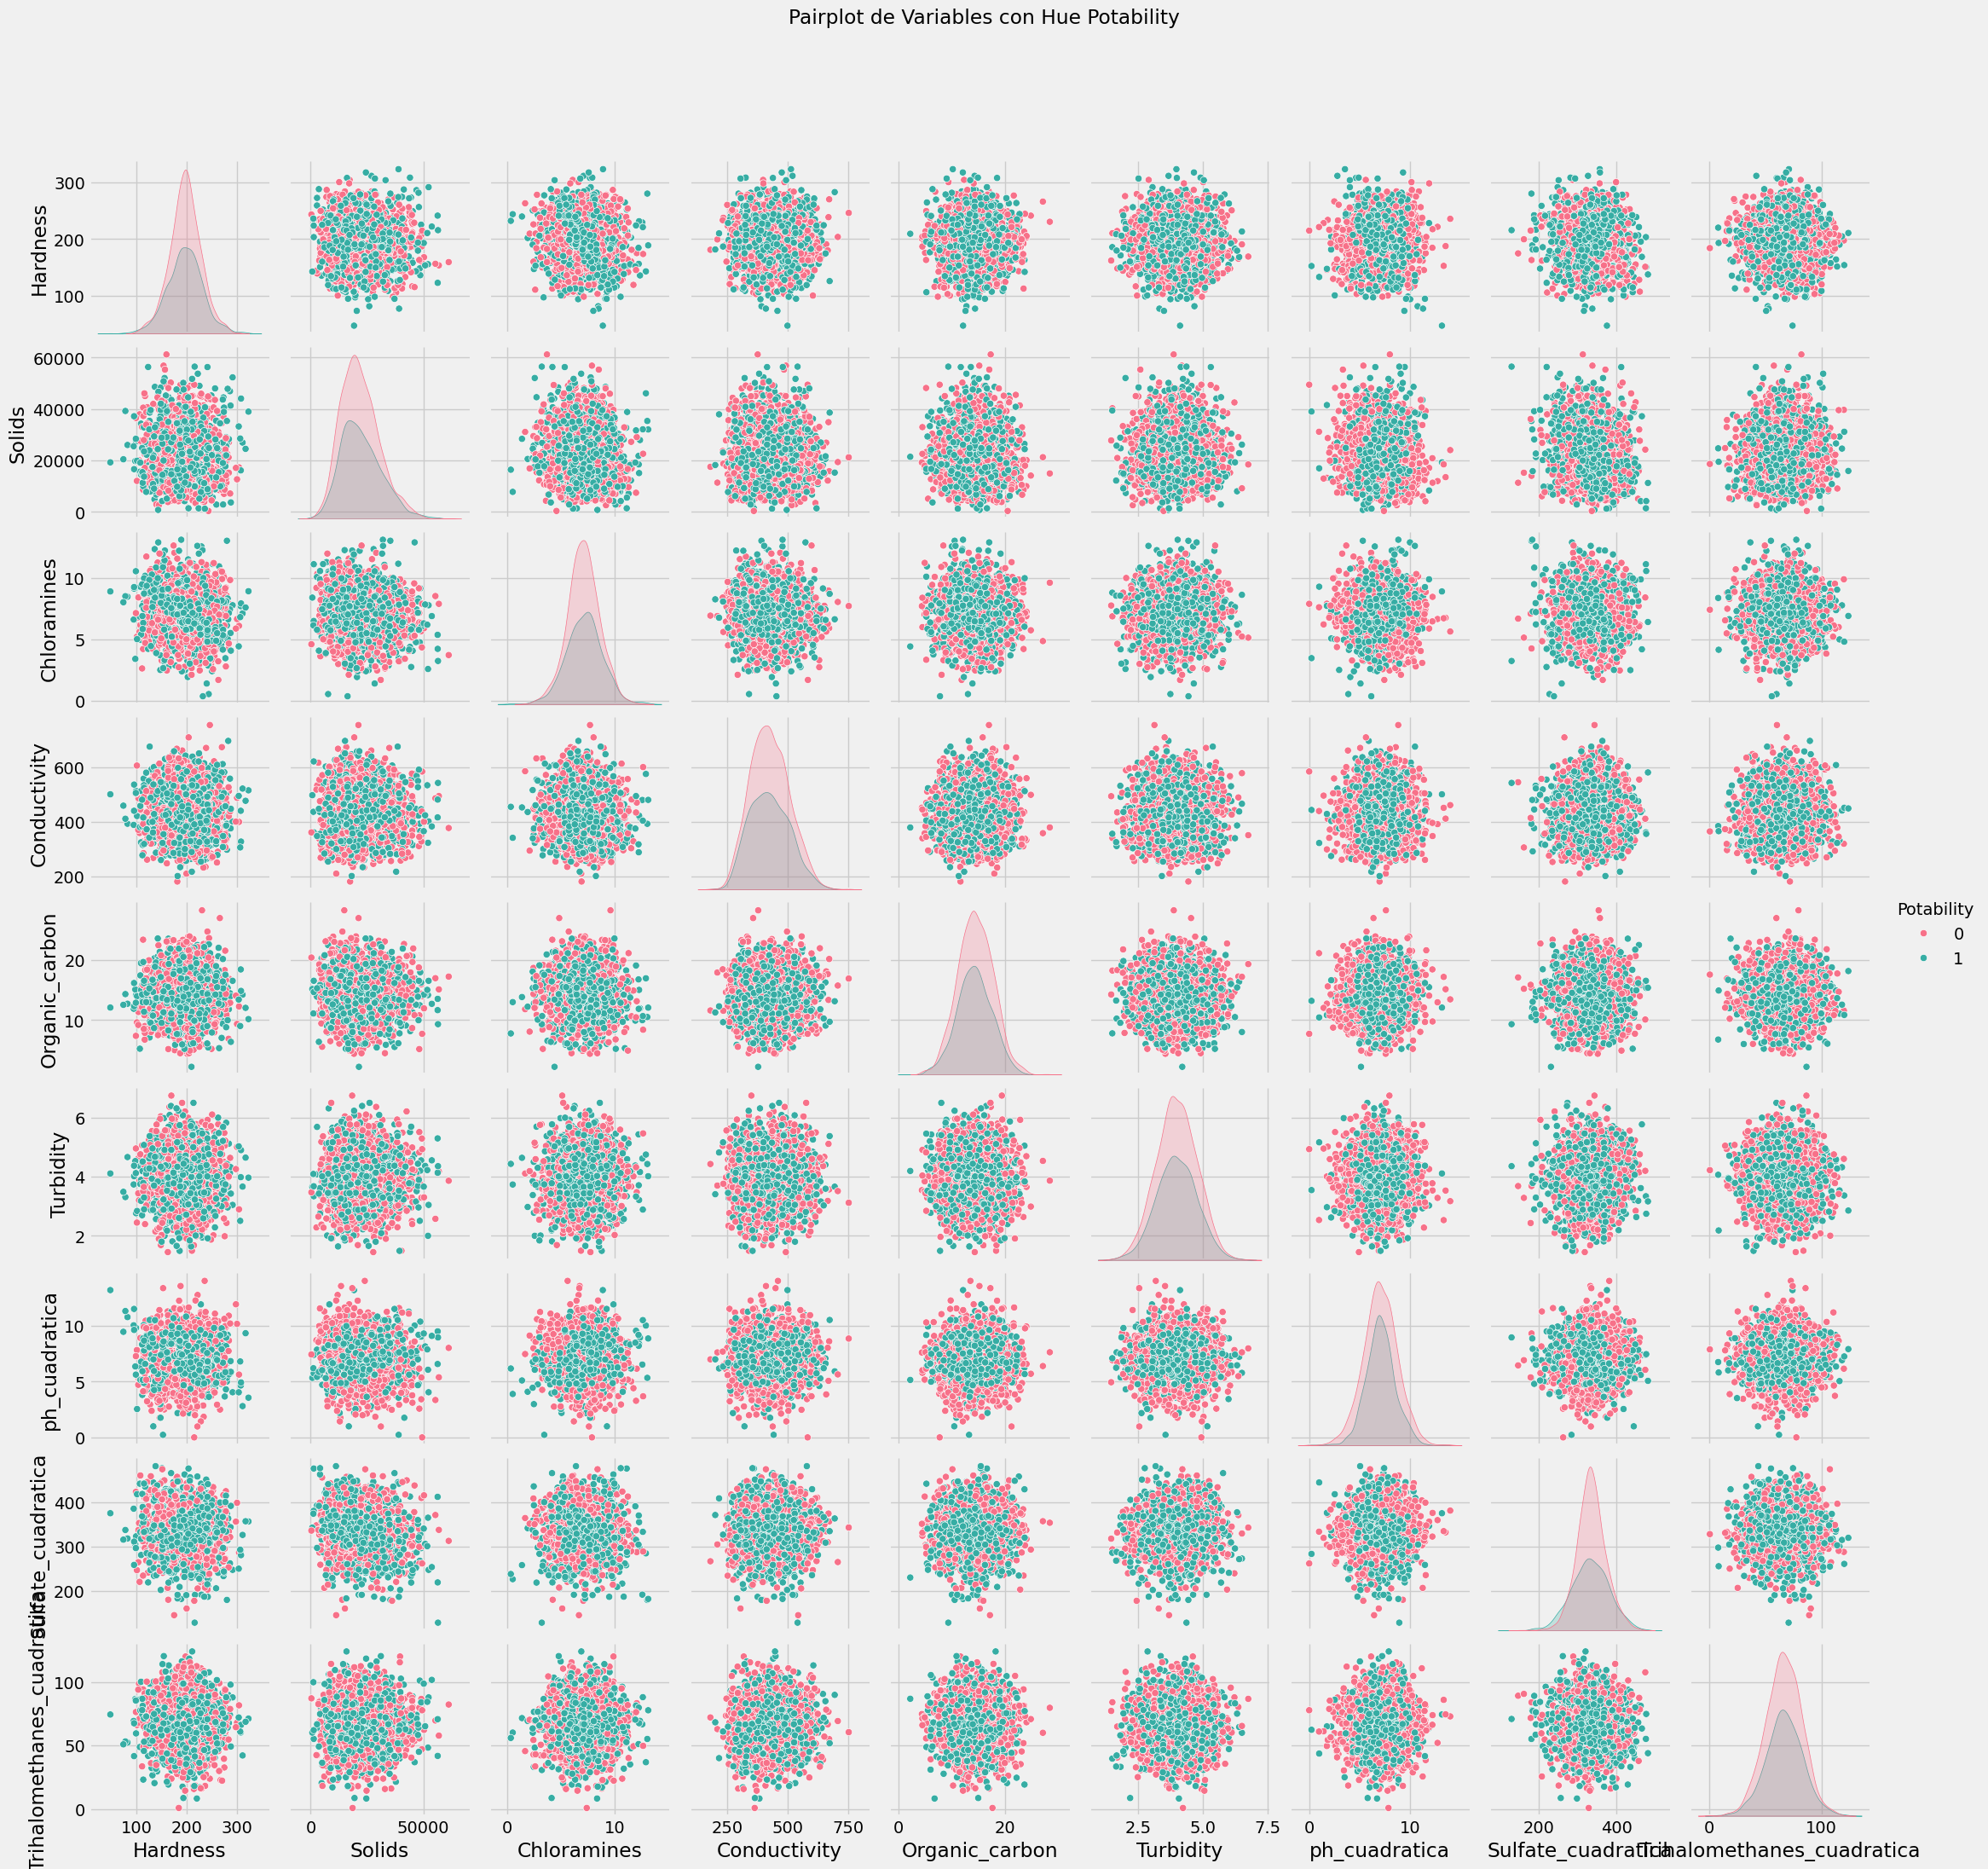

In [353]:
# Crear el pairplot
sns.pairplot(data, hue='Potability', palette='husl', diag_kind='kde')

# Ajustar el tamaño de la figura (opcional)
plt.subplots_adjust(top=0.9)

# Agregar título (opcional)
plt.suptitle('Pairplot de Variables con Hue Potability')

plt.show()

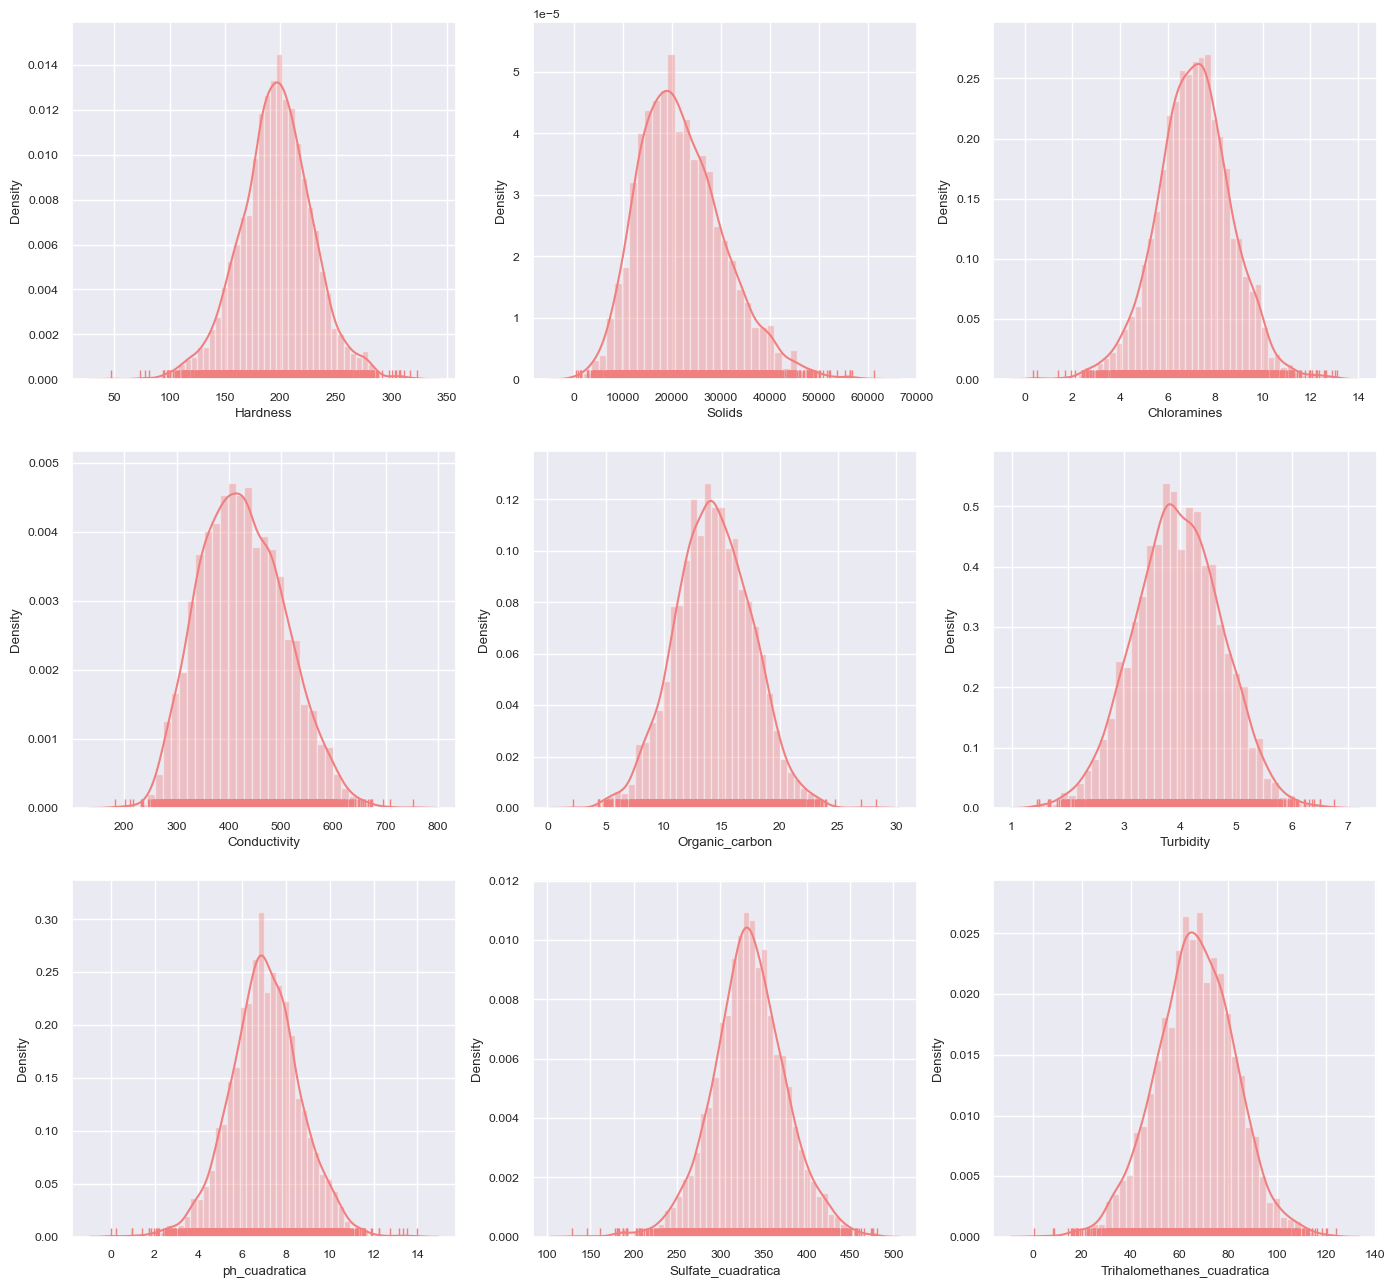

In [390]:
def graficar_distribuciones(data):
    """
    Crea un conjunto de gráficos de distribución para visualizar la distribución 
    de cada columna numérica en un DataFrame.

    Args:
        data (pd.DataFrame): El DataFrame que contiene los datos.

    Returns:
        None: Muestra los gráficos directamente.
    """
    # Calcula el número total de columnas en el DataFrame
    num_columnas = len(data.columns)

    # Determina el número de filas necesarias para la cuadrícula de gráficos
    num_filas = int(np.ceil(num_columnas / 3))

    # Crea una figura con una cuadrícula de subplots
    fig, axes = plt.subplots(nrows=num_filas, ncols=3, figsize=(15, 15))
 
    # Itera sobre cada columna del DataFrame
    for i, columna in enumerate(data.columns):
        # Calcula la posición del subplot en la cuadrícula
        fila = i // 3
        col = i % 3

        # Crea un gráfico de distribución en el subplot correspondiente
        sns.distplot(
            data[columna],  # Datos de la columna actual
            color="lightcoral",  # Color de la distribución
            ax=axes[fila, col],  # Eje donde se dibujará el gráfico
            kde=True,  # Mostrar la curva de densidad de kernel
            rug=True  # Mostrar un "rug plot" para visualizar los puntos de datos
        )
    # Muestra la figura con todos los gráficos
    plt.show()
    
# Aplicación:
# Elimina la columna 'Potability' del DataFrame original
datos_a_graficar = data.drop(['Potability'], axis=1)
# Llama a la función para crear los gráficos
graficar_distribuciones(datos_a_graficar)

# Hardness

In [24]:
data['Hardness'].describe()

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

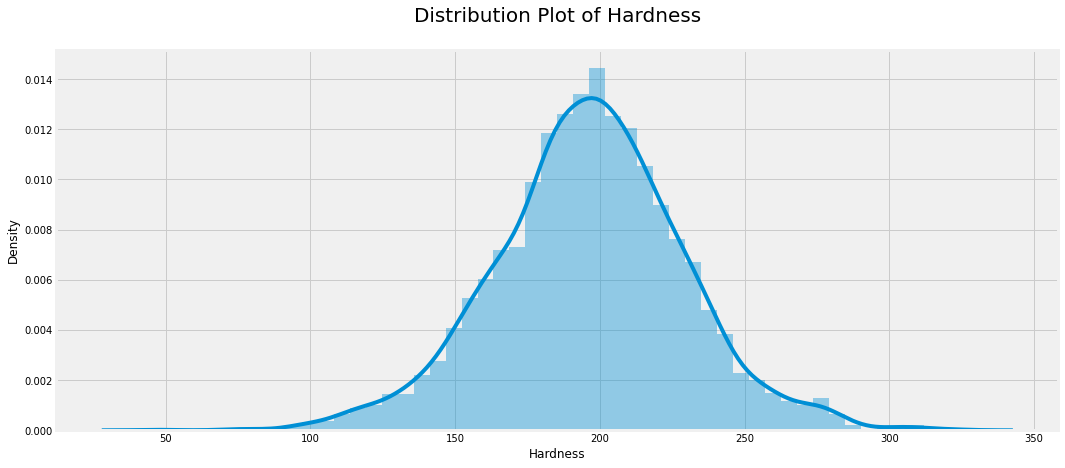

In [25]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Hardness'])
plt.title('Distribution Plot of Hardness\n', fontsize =  20)
plt.show()

In [391]:
fig = px.scatter(
    data,  # DataFrame con los datos
    x=range(data['Hardness'].count()),  # Eje X: Rango del número de elementos en 'Hardness'
    y=sorted(data['Hardness']),  # Eje Y: Valores ordenados de 'Hardness'
    color=data['Potability'],  # Color de los puntos basado en la columna 'Potability'
    labels={  # Etiquetas para los ejes y el color
        'x': "Conteo",  # Etiqueta del eje X
        'y': "Dureza",  # Etiqueta del eje Y
        'color': 'Potabilidad'  # Etiqueta del color
    },
    template="plotly_dark"  # Tema visual oscuro para el gráfico
)

# Actualiza el título del gráfico
fig.update_layout(title="Dureza respecto a Potabilidad")

# Muestra el gráfico
fig.show()

In [27]:
px.histogram(data_frame = data, x = 'Hardness', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

# Solids

In [28]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

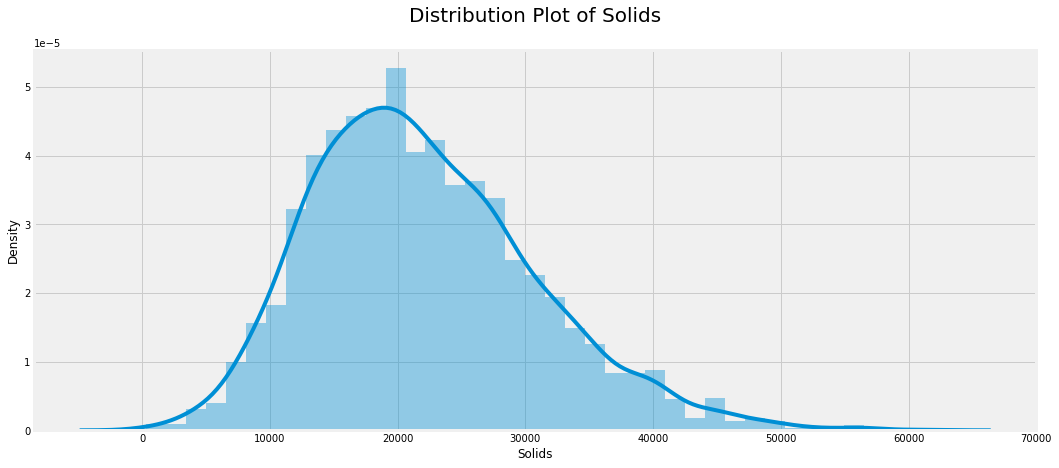

In [29]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Solids'])
plt.title('Distribution Plot of Solids\n', fontsize =  20)
plt.show()

In [30]:
fig = px.scatter(data, sorted(data["Solids"]), range(data["Solids"].count()), color="Potability", facet_col="Potability", 
                 facet_row="Potability")
fig.show()

In [31]:
px.histogram(data_frame = data, x = 'Solids', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [393]:
# basic scatter plot
fig = px.scatter(data,range(data['Solids'].count()), sorted(data['Solids']),
                 color=data['Potability'],
                 labels={
                     'x': "Count",
                     'y': "Solidos",
                     'color':'Potability'
                     
                 },
                 color_continuous_scale=px.colors.sequential.tempo,
                 template = 'plotly_dark')
fig.update_layout(title='Solids wrt Potability')
fig.show()

# Chloramines

In [33]:
data['Chloramines'].describe()

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64

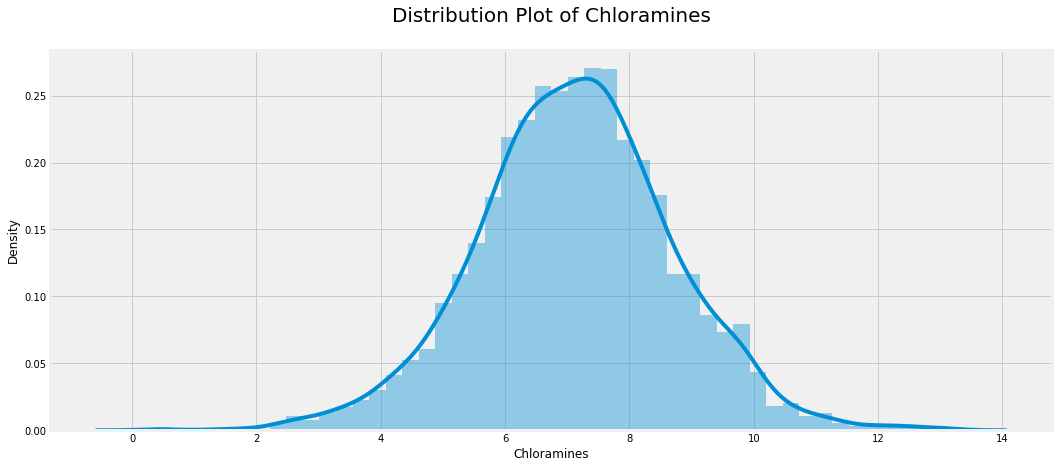

In [34]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Chloramines'])
plt.title('Distribution Plot of Chloramines\n', fontsize =  20)
plt.show()

In [35]:
fig = px.line(x=range(data['Chloramines'].count()), y=sorted(data['Chloramines']),color=data['Potability'], labels={
                     'x': "Count",
                     'y': "Chloramines",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Chloramines wrt Potability')
fig.show()

In [36]:
fig = px.box(x = 'Chloramines', data_frame = data, template = 'plotly_dark')
fig.update_layout(title='Chloramines')
fig.show()

# Conductivity

In [37]:
data["Conductivity"].describe()

count    3276.000000
mean      426.205111
std        80.824064
min       181.483754
25%       365.734414
50%       421.884968
75%       481.792304
max       753.342620
Name: Conductivity, dtype: float64

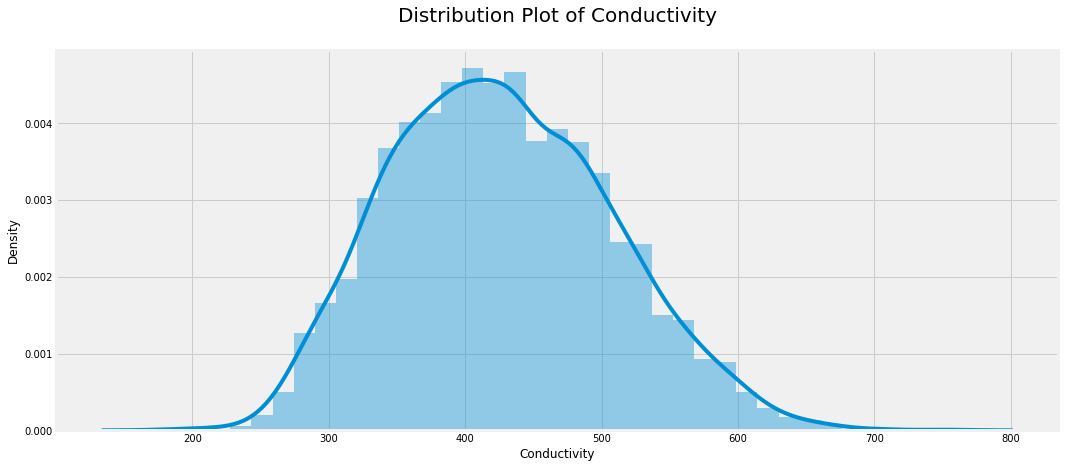

In [38]:
plt.figure(figsize = (16, 7))
sns.distplot(data['Conductivity'])
plt.title('Distribution Plot of Conductivity\n', fontsize =  20)
plt.show()

In [39]:
fig = px.bar(data, x=range(data['Conductivity'].count()),
             y=sorted(data['Conductivity']), labels={
                     'x': "Count",
                     'y': "Conductivity",
                     'color':'Potability'
                     
                 },
             color=data['Potability']
             ,template = 'plotly_dark')
fig.update_layout(title='Conductivity wrt Potability')
fig.show() 

In [40]:

group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([data['Conductivity']], group_labels)
fig.show()

# Organic_carbon

In [41]:
data['Organic_carbon'].describe()

count    3276.000000
mean       14.284970
std         3.308162
min         2.200000
25%        12.065801
50%        14.218338
75%        16.557652
max        28.300000
Name: Organic_carbon, dtype: float64

In [42]:

group_labels = ['Organic_carbon'] # name of the dataset

fig = ff.create_distplot([data['Organic_carbon']], group_labels)
fig.show()

In [43]:
dt_5=data[data['Organic_carbon']<5]
dt_5_10=data[(data['Organic_carbon']>5)&(data['Organic_carbon']<10)]
dt_10_15=data[(data['Organic_carbon']>10)&(data['Organic_carbon']<15)]
dt_15_20=data[(data['Organic_carbon']>15)&(data['Organic_carbon']<20)]
dt_20_25=data[(data['Organic_carbon']>20)&(data['Organic_carbon']<25)]
dt_25=data[(data['Organic_carbon']>25)]

x_Age = ['5', '5-10', '10-15', '15-20', '25+']
y_Age = [len(dt_5.values), len(dt_5_10.values), len(dt_10_15.values), len(dt_15_20.values),
     len(dt_25.values)]

px.bar(data_frame = data, x = x_Age, y = y_Age, color = x_Age, template = 'plotly_dark',
       title = 'Number of passengers per Age group')

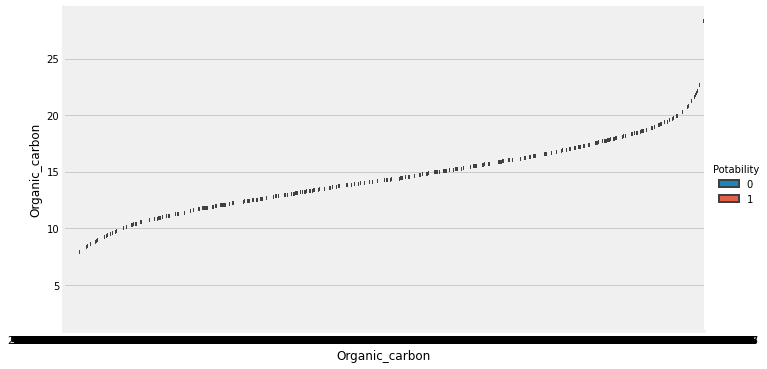

In [44]:
sns.catplot(x = 'Organic_carbon', y = 'Organic_carbon', hue = 'Potability', data = data, kind = 'box',
            height = 5, aspect = 2)
plt.show()

# Turbidity

In [45]:
data['Turbidity'].describe()

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64

In [46]:

group_labels = ['Turbidity'] # name of the dataset

fig = ff.create_distplot([data['Turbidity']], group_labels)
fig.show()

In [47]:
data['turbid_class']=data['Turbidity'].astype(int)

In [48]:
data['turbid_class'].unique()

array([2, 4, 3, 5, 6, 1])

In [49]:
px.scatter(data_frame = data, x = 'Turbidity', y = 'turbid_class', color = 'Potability', template = 'plotly_dark')

In [50]:
fig = px.pie(data,
             values=data['turbid_class'].value_counts(), 
             names=data['turbid_class'].value_counts().keys(),
            )
fig.update_layout(
    title='turbid_class',
    template = 'plotly_dark'
)
fig.show()

In [51]:
data=data.drop(['turbid_class'],axis=1)

# ph_random

In [52]:
data['ph_random'].describe()

count    3276.000000
mean        7.071639
std         1.607991
min         0.000000
25%         6.081460
50%         7.029490
75%         8.063147
max        14.000000
Name: ph_random, dtype: float64

In [53]:

group_labels = ['ph_random'] # name of the dataset

fig = ff.create_distplot([data['ph_random']], group_labels)
fig.show()

In [54]:
px.histogram(data_frame = data, x = 'ph_random', nbins = 10, color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [55]:
fig = px.scatter(data, sorted(data["ph_random"]), range(data["ph_random"].count()), color="Potability", facet_col="Potability", 
                 facet_row="Potability")
fig.show()

# Sulfate_random

In [56]:
data['Sulfate_random'].describe()

count    3276.000000
mean      333.430954
std        41.026947
min       129.000000
25%       307.523159
50%       332.879578
75%       359.710517
max       481.030642
Name: Sulfate_random, dtype: float64

In [57]:
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([data['Sulfate_random']], group_labels)
fig.show()

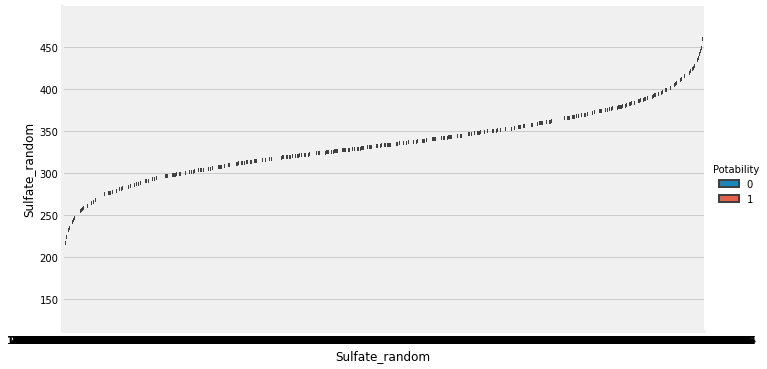

In [58]:
sns.catplot(x = 'Sulfate_random', y = 'Sulfate_random', hue = 'Potability', data = data, kind = 'box',
            height = 5, aspect = 2)
plt.show()

# Trihalomethanes_random

In [59]:
data['Trihalomethanes_random'].describe()

count    3276.000000
mean       66.419200
std        16.184832
min         0.738000
25%        55.861675
50%        66.639068
75%        77.384166
max       124.000000
Name: Trihalomethanes_random, dtype: float64

In [60]:

group_labels = ['Trihalomethanes_random'] # name of the dataset

fig = ff.create_distplot([data['Trihalomethanes_random']], group_labels)
fig.show()

In [61]:
fig = px.box(x = 'Trihalomethanes_random', data_frame = data, template = 'plotly_dark')
fig.update_layout(title='Trihalomethanes_random')
fig.show()

In [62]:
fig = px.line(x=range(data['Trihalomethanes_random'].count()), y=sorted(data['Trihalomethanes_random']),color=data['Potability'], labels={
                     'x': "Count",
                     'y': "Trihalomethanes",
                     'color':'Potability'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Trihalomethane wrt Potability')
fig.show()

# Potability

In [63]:
data['Potability'].describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

In [64]:
px.histogram(data_frame = data, x = 'Potability', color = 'Potability', marginal = 'box',
             template = 'plotly_dark')

In [65]:
fig = px.pie(data,
             values=data['Potability'].value_counts(), 
             names=data['Potability'].value_counts().keys(),
            )
fig.update_layout(
    title='Potability',
    template = 'plotly_dark'
)
fig.show()

# Data Preprocessing

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [67]:
X=data.drop(['Potability'],axis=1)
y=data['Potability']

Since the data is not in a uniform shape, we scale the data using standard scalar

In [68]:
scaler = StandardScaler()
x=scaler.fit_transform(X)

In [69]:
# split the data to train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.85,random_state=42)


print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))

training data shape:-(2784, 9) labels(2784,) 
testing data shape:-(492, 9) labels(492,) 


# Modeling

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0).fit(x_train, y_train)
log.score(x_test, y_test)

0.6219512195121951

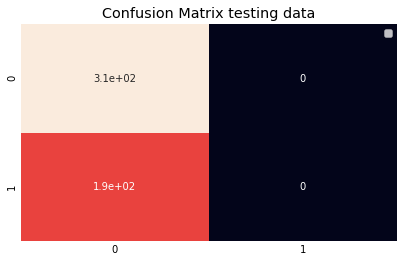

In [71]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=log.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### K Nearest Neighbours

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
knn.fit(x_train,y_train)

#Predict Output
predicted= knn.predict(x_test) # 0:Overcast, 2:Mild


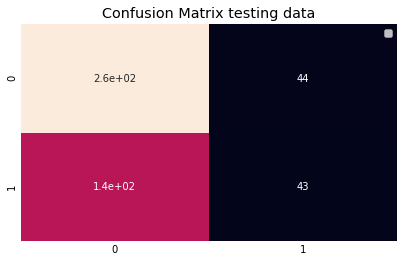

In [74]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=knn.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### SVM

In [75]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [76]:
svmc = svm.SVC()
svmc.fit(x_train, y_train)

y_pred = svmc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6808943089430894


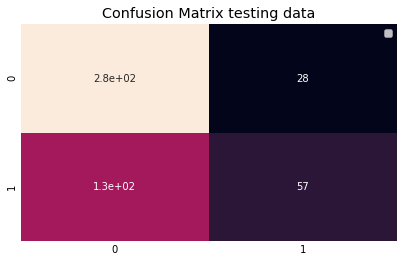

In [77]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=svmc.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### Decision Tree

In [78]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [79]:
tre = tree.DecisionTreeClassifier()
tre = tre.fit(x_train, y_train)

y_pred = tre.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5487804878048781


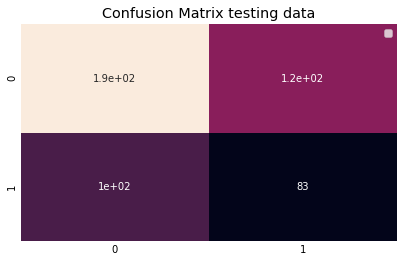

In [80]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=tre.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [82]:
# create the model
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=100)


# fitting the model
model_rf=model_rf.fit(x_train, y_train) 

y_pred = model_rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6788617886178862


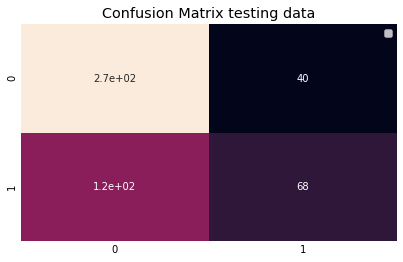

In [83]:
#  Confusion matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
pred1=model_rf.predict(np.array(x_test))
plt.title("Confusion Matrix testing data")
sns.heatmap(confusion_matrix(y_test,pred1),annot=True,cbar=False)
plt.legend()
plt.show()

### XG Boost

In [84]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score

xgb = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 8,
                    nthread= 5,
                    random_state= 0,
                    )
xgb.fit(x_train,y_train)

[14:31:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.99, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=5, nthread=5, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(xgb.score(x_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(xgb.score(x_test, y_test)))

Accuracy of XGBoost classifier on training set: 0.72
Accuracy of XGBoost classifier on test set: 0.63


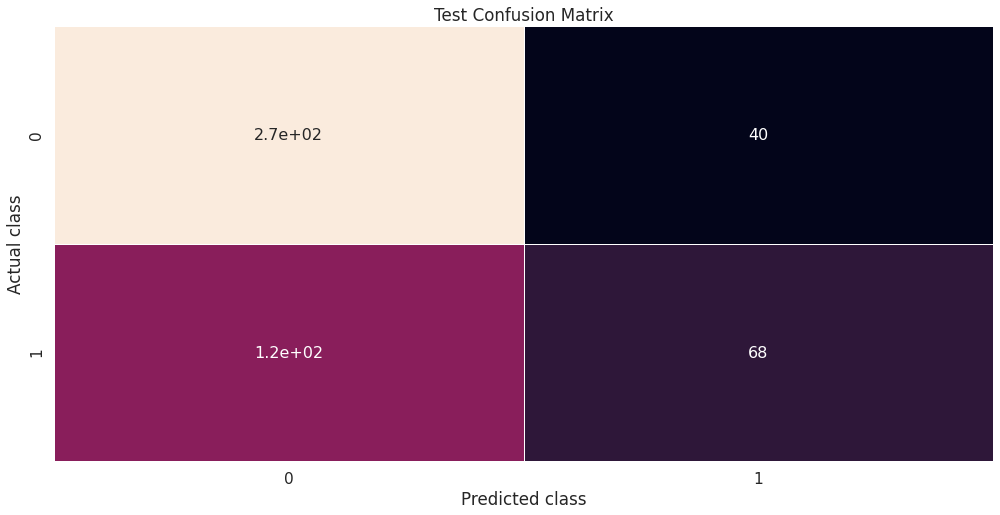

In [86]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cbar=False, linewidths = 1) # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()

### SVM tuned

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid={'C':[1.2,1.5,2.2,3.5,3.2,4.1],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,4,8,10],'gamma':['scale','auto']}
gridsearch=GridSearchCV(svc,param_grid=param_grid,n_jobs=-1,verbose=4,cv=3)
gridsearch.fit(x_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   51.0s finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.2, 1.5, 2.2, 3.5, 3.2, 4.1],
                         'degree': [1, 2, 4, 8, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=4)

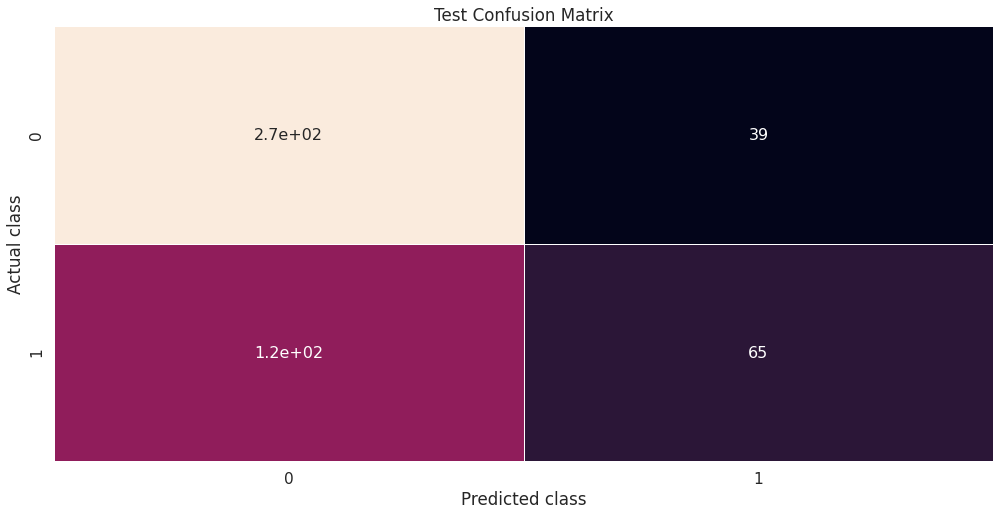

In [88]:
y_pred=gridsearch.predict(x_test)
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cbar=False, linewidths = 1) # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()